# Optimisation de l'entrepôt ( des produits)

La tâche consiste à analyser les données de vente d'un détaillant e-commerce britannique. L'espace de stockage étant coûteux et qu'une livraison rapide est importante pour l'emporter sur la concurrence, afin d'éviter trop d'invendus et la rupture de stock, le client aimerait savoir d'avance :  
* quelle quantité de produit réserver pour la semaine suivante pour chaque pays

*   quel prix unitaire proposer pour chaque produit par pays


# Processus de développement du modèle prédictf ✨
* analyse des ventes, détection des insights, feature engineering
* Feature Selection & modelisation
* Mise en place du dashboard utilisant le modèle

 ✈  Ce fichier concerne l'analyse des ventes, la détection des insights et feature engineering

# Importation des librairies nécessaires.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/content/drive/MyDrive/datasets/data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str})
df.shape

(541909, 8)

In [7]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom


Nous voyons que le fichier de données contient des informations pour chaque transaction. Examinons le numéro de facture et l'identifiant du client des premières entrées.

Nous voyons ici qu'un client du Royaume-Uni, dont l'ID est 17850, a passé une commande unique portant le numéro de facture 536365. Le client a commandé plusieurs produits avec des codes de stock, des descriptions, des prix unitaires et des quantités différents.

En outre, nous pouvons voir que la date de facturation était la même pour ces produits.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


# Exploration des données
Impregnons-nous  des données

In [9]:
# Les données manquantes
"""
Quel pourcentage de valeurs manquantes avons-nous pour chaque caractéristique ?
"""

missing_percentage = df.isnull().sum() / df.shape[0] * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

# Réponse
Près de 25 % des clients sont inconnus ! C'est très étrange.

En outre, nous avons 0,2 % de descriptions manquantes. C'est un peu sale. Prenons quelques exemples pour nous faire une idée plus précise de la situation.

# Voyons les descriptions manquantes

In [11]:

df[df.Description.isnull()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,12/1/2010 14:35,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,12/1/2010 14:35,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom


# Combien de fois passons-nous également à côté du client ?


In [12]:

df[df.Description.isnull()].CustomerID.isnull().value_counts()

CustomerID
True    1454
Name: count, dtype: int64

# voyons aussi les prix unitaires

In [13]:
df[df.Description.isnull()].UnitPrice.value_counts()

UnitPrice
0.0    1454
Name: count, dtype: int64

Nous  manquons toujours l'ID du client et le prix unitaire dans certains enregistrements.

Pourquoi le casier enregistre-t-il ce type d'entrées sans autre description ? Il semble qu'il n'existe pas de procédure sophistiquée pour traiter et enregistrer ce type de transactions.

C'est déjà un indice que nous pouvons nous attendre à des entrées étranges dans nos données et qu'il peut être difficile de les détecter !

In [14]:
df[df.CustomerID.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [15]:
df.loc[df.CustomerID.isnull(), ["UnitPrice", "Quantity"]].describe()

,UnitPrice,Quantity
count,135080.000000,135080.000000
mean,8.076577,1.995573
std,151.900816,66.696153
min,-11062.060000,-9600.000000
25%,1.630000,1.000000
50%,3.290000,1.000000
75%,5.450000,3.000000
max,17836.460000,5568.000000


Ce n'est pas non plus une bonne chose. Le prix et les quantités des entrées sans numéro d'identification du client peuvent présenter des valeurs aberrantes.

Notre conseil au manager: Le premier conseil que nous donnons au détaillant est de mettre en place des stratégies pour les transactions qui sont en quelque sorte défectueuses ou spéciales.

# Analyse approfondie sur les descriptions manquantes ( "nan", "")

In [16]:
df.loc[df.Description.isnull()==False, "lowercase_descriptions"] = df.loc[
    df.Description.isnull()==False,"Description"
].apply(lambda l: l.lower())

df.lowercase_descriptions.dropna().apply(
    lambda l: np.where("nan" in l, True, False)
).value_counts()

lowercase_descriptions
False    539724
True        731
Name: count, dtype: int64

In [17]:
df.lowercase_descriptions.dropna().apply(
    lambda l: np.where("" == l, True, False)
).value_counts()

lowercase_descriptions
False    540455
Name: count, dtype: int64

In [18]:
df.loc[df.lowercase_descriptions.isnull()==False, "lowercase_descriptions"] = df.loc[
    df.lowercase_descriptions.isnull()==False, "lowercase_descriptions"
].apply(lambda l: np.where("nan" in l, None, l))

In [19]:
data = df.loc[(df.CustomerID.isnull()==False) & (df.lowercase_descriptions.isnull()==False)].copy()

In [20]:
data.isnull().sum().sum()

0

### La période de vente <a class="anchor" id="timeperiod"></a>

Quelle est la durée en jour des ventes?

In [21]:
data["InvoiceDate"] = pd.to_datetime(data.InvoiceDate, cache=True)

data.InvoiceDate.max() - data.InvoiceDate.min()

Timedelta('373 days 04:24:00')

In [24]:
print("Date de début selon les données : {}".format(data.InvoiceDate.min()))
print("Date de fin selon les données   :  {}".format(data.InvoiceDate.max()))

Date de début selon les données : 2010-12-01 08:26:00
Date de fin selon les données   :  2011-12-09 12:50:00


In [25]:
# Nombre de numéros de factures différents

data.InvoiceNo.nunique()

22186

Les données nous font constater qu'une transaction annulée commence par un « C ».

Créons une fonctionnalité permettant de filtrer facilement ces cas :

In [26]:
data["IsCancelled"]=np.where(data.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
data.IsCancelled.value_counts() / data.shape[0] * 100

IsCancelled
False    97.81007
True      2.18993
Name: count, dtype: float64

2,19 % des transactions ont été annulées (n'ayant des informations sur les annulations, nous ne pourrons rien dire).

In [27]:
data.loc[data.IsCancelled==True].describe()

,Quantity,InvoiceDate,UnitPrice
count,8896.000000,8896,8896.000000
mean,-30.882981,2011-06-27 06:10:27.308902912,18.862815
min,-80995.000000,2010-12-01 09:41:00,0.010000
25%,-6.000000,2011-03-22 16:07:00,1.450000
50%,-2.000000,2011-07-11 13:51:00,2.950000
75%,-1.000000,2011-10-06 20:36:00,4.950000
max,-1.000000,2011-12-09 11:58:00,38970.000000
std,1170.746458,NaN,444.590459


Toutes les annulations ont des quantités négatives mais des prix unitaires positifs et non nuls. Compte tenu de ces données, il n'est pas facile de comprendre pourquoi un client a effectué un retour et il est très difficile de prévoir de tels cas, car il peut y avoir plusieurs raisons cachées pour lesquelles une annulation a été effectuée.

Nous allons tout simplement les supprimer.

In [28]:
data = data.loc[data.IsCancelled==False].copy()
data = data.drop("IsCancelled", axis=1)

In [29]:
# Nombre d'articles différents ( que vend le client)
data.StockCode.nunique()

3663

# Les articles les plus vendus

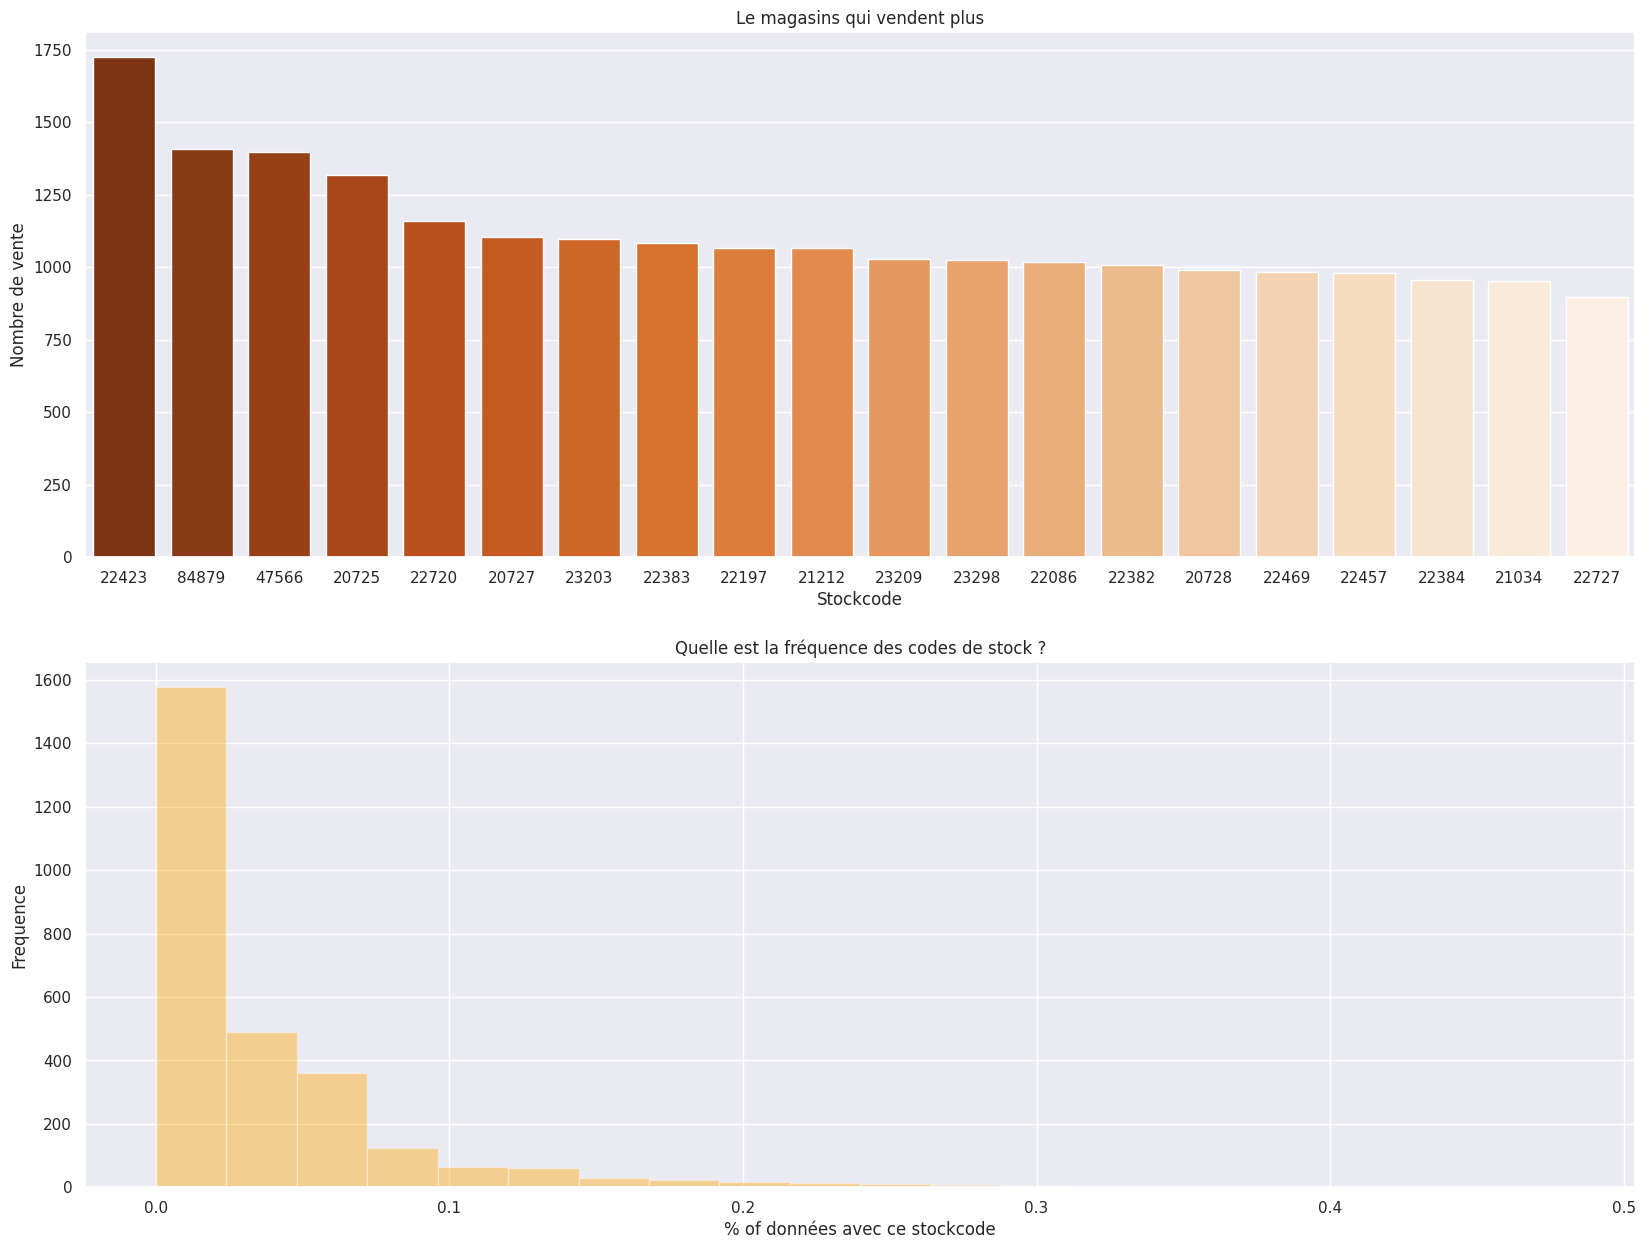

In [131]:
stockcode_counts = data.StockCode.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(x=stockcode_counts.iloc[0:20].index,
            y=stockcode_counts.iloc[0:20].values,
            ax = ax[0], palette="Oranges_r")
ax[0].set_ylabel("Nombre de vente")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Le magasins qui vendent plus");
sns.distplot(np.round(stockcode_counts/data.shape[0]*100,2),
             kde=False,
             bins=20,
             ax=ax[1], color="Orange")
ax[1].set_title("Quelle est la fréquence des codes de stock ?")
ax[1].set_xlabel("% of données avec ce stockcode")
ax[1].set_ylabel("Frequence");


* Le **POST** est-il un des articles ?! **Nous pourrions donc nous attendre à des occurrences étranges non seulement dans les descriptions et les identifiants des clients, mais aussi dans les codes de stock.  Son code est plus court que les autres et n'est pas numérique.
* La plupart des codes de stock sont très rares.

 ✔ Déduction

**Le détaillant vend beaucoup de produits différents** et qu'il n'y a pas de spécialisation forte d'un code de stock spécifique. Néanmoins, nous devons être prudents car cela ne doit pas signifier que le détaillant n'est pas spécialisé dans un type de produit spécifique. Le code de stock peut être un indicateur très détaillé qui ne fournit pas d'informations sur le type de produit.

In [51]:
def count_numeric_chars(l):
    return sum(1 for c in l if c.isdigit())

data["StockCodeLength"] = data.StockCode.apply(lambda l: len(l))
data["nNumericStockCode"] = data.StockCode.apply(lambda l: count_numeric_chars(l))

In [70]:
data["StockCodeLength"].value_counts()

StockCodeLength
5    362522
Name: count, dtype: int64

<Axes: >

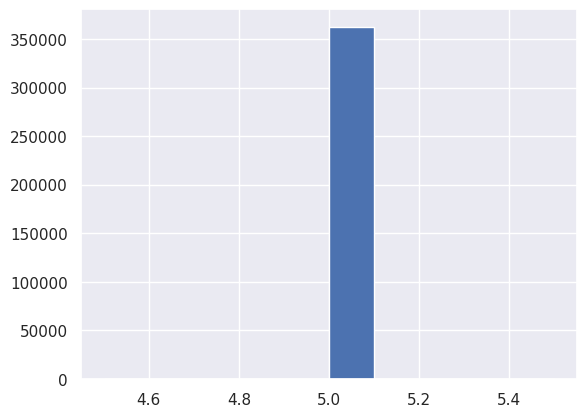

In [66]:
data["StockCodeLength"].hist(bins=10,label="Plage des produits")

<Axes: >

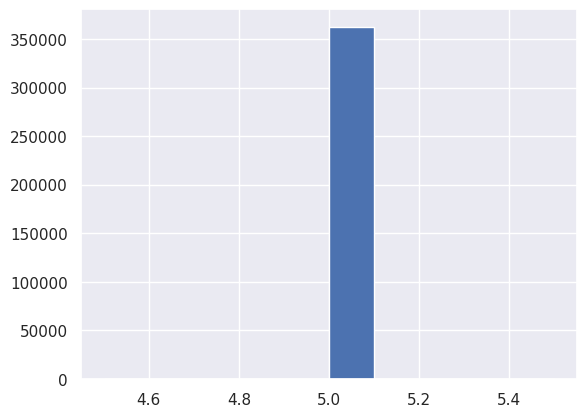

In [68]:
data["nNumericStockCode"].hist()


Bien que la majorité des échantillons aient un code de stock composé de 5 caractères numériques, nous pouvons constater qu'il y a d'autres occurrences.

La longueur peut varier entre 1 et 12 et il y a des codes de stock sans aucun caractère numérique !

In [37]:
data.loc[data.nNumericStockCode < 5].lowercase_descriptions.value_counts()

lowercase_descriptions
postage                       1099
manual                         290
carriage                       133
dotcom postage                  16
bank charges                    12
pads to match all cushions       4
Name: count, dtype: int64

In [38]:
data = data.loc[(data.nNumericStockCode == 5) & (data.StockCodeLength==5)].copy()
data.StockCode.nunique()

2783

In [39]:
data = data.drop(["nNumericStockCode", "StockCodeLength"], axis=1)

In [40]:
data.Description.nunique()

2983

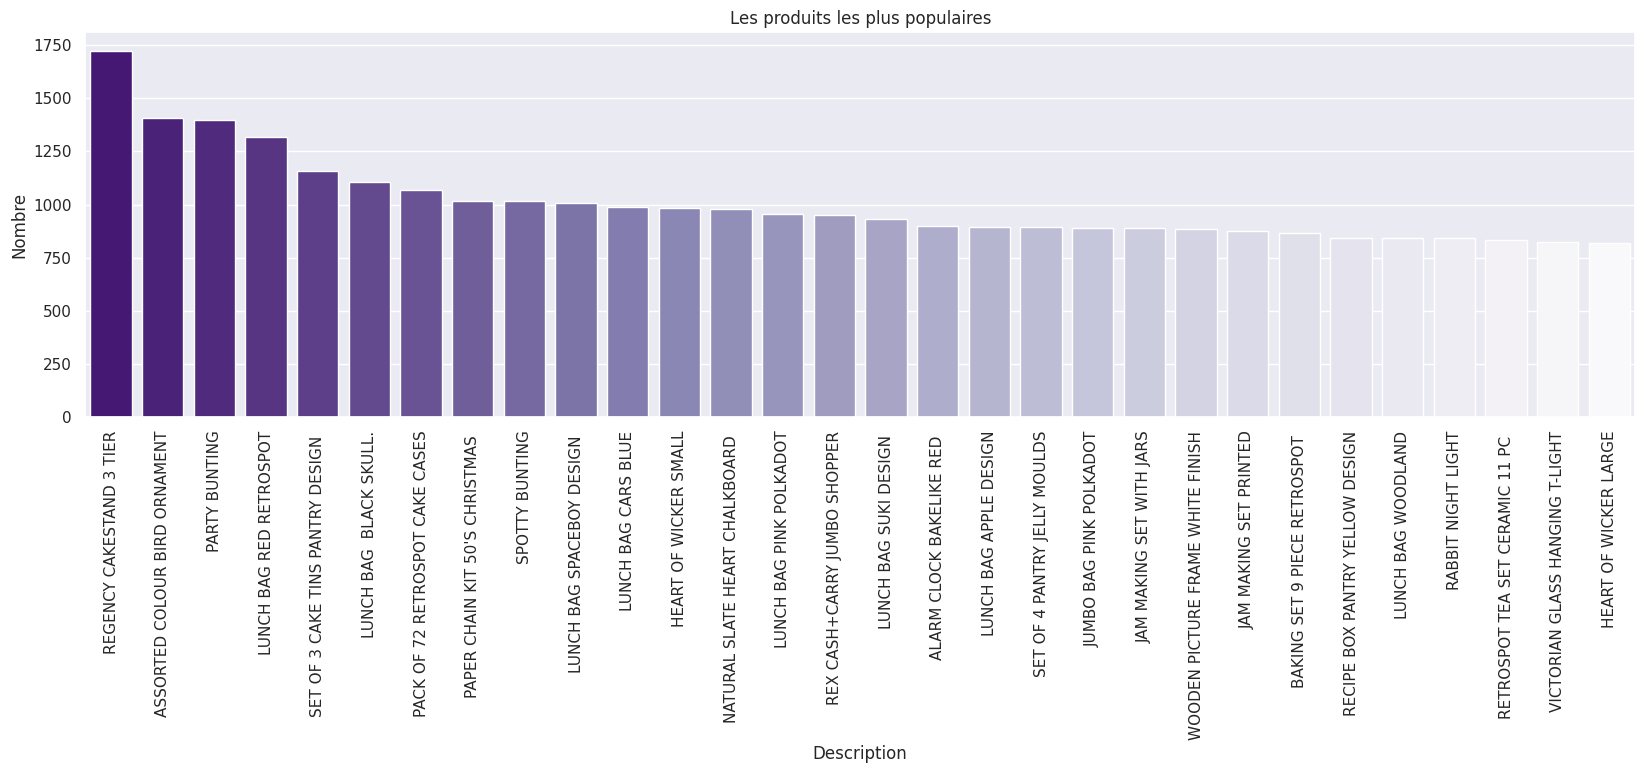

In [119]:
description_counts = data.Description.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(x=description_counts.index, y=description_counts.values, palette="Purples_r")
plt.ylabel("Nombre")
plt.title("Les produits les plus populaires");
plt.xticks(rotation=90);

In [43]:
def count_lower_chars(l):
    return sum(1 for c in l if c.islower())

In [44]:
data["DescriptionLength"] = data.Description.apply(lambda l: len(l))
data["LowCharsInDescription"] = data.Description.apply(lambda l: count_lower_chars(l))

In [73]:
data["DescriptionLength"].index

Index([     1,      5,      6,      7,      8,      9,     10,     11,     12,
           13,
       ...
       541899, 541900, 541901, 541902, 541903, 541904, 541905, 541906, 541907,
       541908],
      dtype='int64', length=362522)

<Axes: >

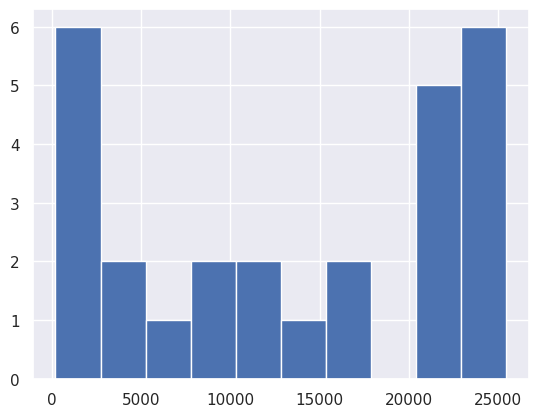

In [81]:
data["DescriptionLength"].value_counts().sort_values(ascending=False).hist()

<Axes: >

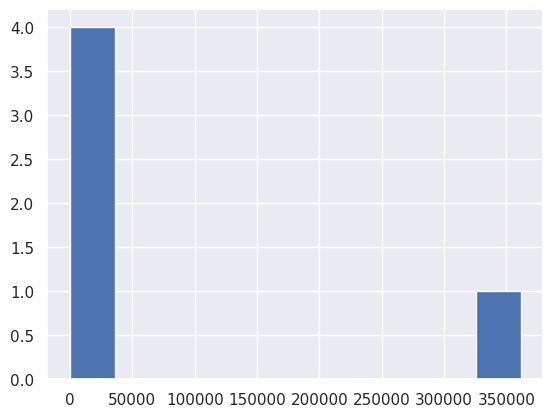

In [82]:

data["LowCharsInDescription"].value_counts().sort_values(ascending=False).hist()


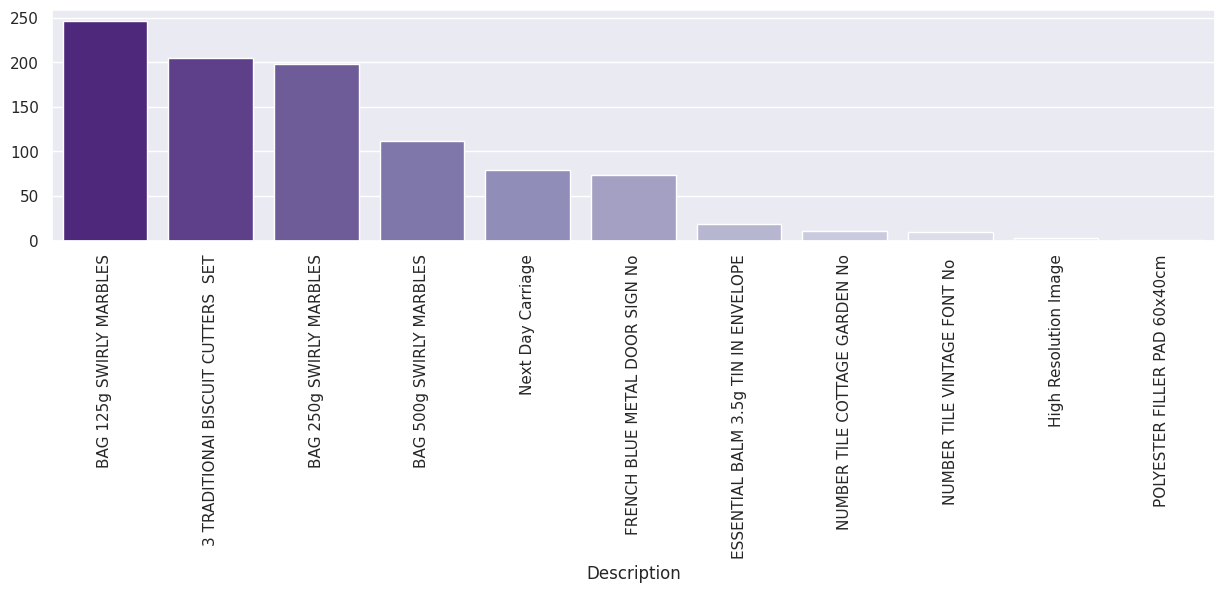

In [45]:
lowchar_counts = data.loc[data.LowCharsInDescription > 0].Description.value_counts()

plt.figure(figsize=(15,3))
sns.barplot(x=lowchar_counts.index, y=lowchar_counts.values, palette="Purples_r")
plt.xticks(rotation=90);

In [46]:
data.groupby("StockCode").Description.nunique().sort_values(ascending=False).iloc[0:10]

StockCode
23236    4
23196    4
23203    3
23366    3
23240    3
23413    3
23131    3
22937    3
23209    3
23396    3
Name: Description, dtype: int64

In [47]:
data.loc[data.StockCode == "23244"].Description.value_counts()

Description
ROUND STORAGE TIN VINTAGE LEAF    96
STORAGE TIN VINTAGE LEAF           7
CANNISTER VINTAGE LEAF DESIGN      2
Name: count, dtype: int64

In [84]:
data["Year"] = data.InvoiceDate.dt.year
data["Quarter"] = data.InvoiceDate.dt.quarter
data["Month"] = data.InvoiceDate.dt.month
data["Week"] = data.InvoiceDate.dt.isocalendar().week
data["Weekday"] = data.InvoiceDate.dt.weekday
data["Day"] = data.InvoiceDate.dt.day
data["Dayofyear"] = data.InvoiceDate.dt.dayofyear
data["Date"] = pd.to_datetime(data[['Year', 'Month', 'Day']])

In [99]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'lowercase_descriptions',
       'DescriptionLength', 'LowCharsInDescription', 'StockCodeLength',
       'nNumericStockCode', 'Year', 'Quarter', 'Month', 'Week', 'Weekday',
       'Day', 'Dayofyear', 'Date'],
      dtype='object')

In [118]:
data.DescriptionLength.nunique(),data.Description.nunique()

(27, 2983)

In [120]:
def description_to_lower(desc):
  return desc.lower()

  data["Description"] =   data["Description"].apply(lambda l : description_to_lower(l))

In [121]:
data.Description.nunique()

2983

In [122]:
grouped_features = ["Date", "Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day",
                    "StockCode","UnitPrice","Country","Description"]

In [123]:
daily_data = pd.DataFrame(data.groupby(grouped_features).Quantity.sum(),
                          columns=["Quantity"])
daily_data = daily_data.reset_index()
daily_data.head(5)

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,UnitPrice,Country,Description,Quantity
0,2010-12-01,2010,4,12,48,2,335,1,10002,0.85,France,INFLATABLE POLITICAL GLOBE,48
1,2010-12-01,2010,4,12,48,2,335,1,10002,0.85,United Kingdom,INFLATABLE POLITICAL GLOBE,12
2,2010-12-01,2010,4,12,48,2,335,1,10125,0.85,United Kingdom,MINI FUNKY DESIGN TAPES,2
3,2010-12-01,2010,4,12,48,2,335,1,10133,0.85,United Kingdom,COLOURING PENCILS BROWN TUBE,5
4,2010-12-01,2010,4,12,48,2,335,1,16014,0.42,United Kingdom,SMALL CHINESE STYLE SCISSOR,10


In [102]:
daily_data.loc[:, ["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,234046.000000,234046.000000
mean,20.341194,2.974592
std,235.459342,4.829297
min,1.000000,0.000000
25%,3.000000,1.060000
50%,8.000000,1.690000
75%,20.000000,3.750000
max,80995.000000,649.500000


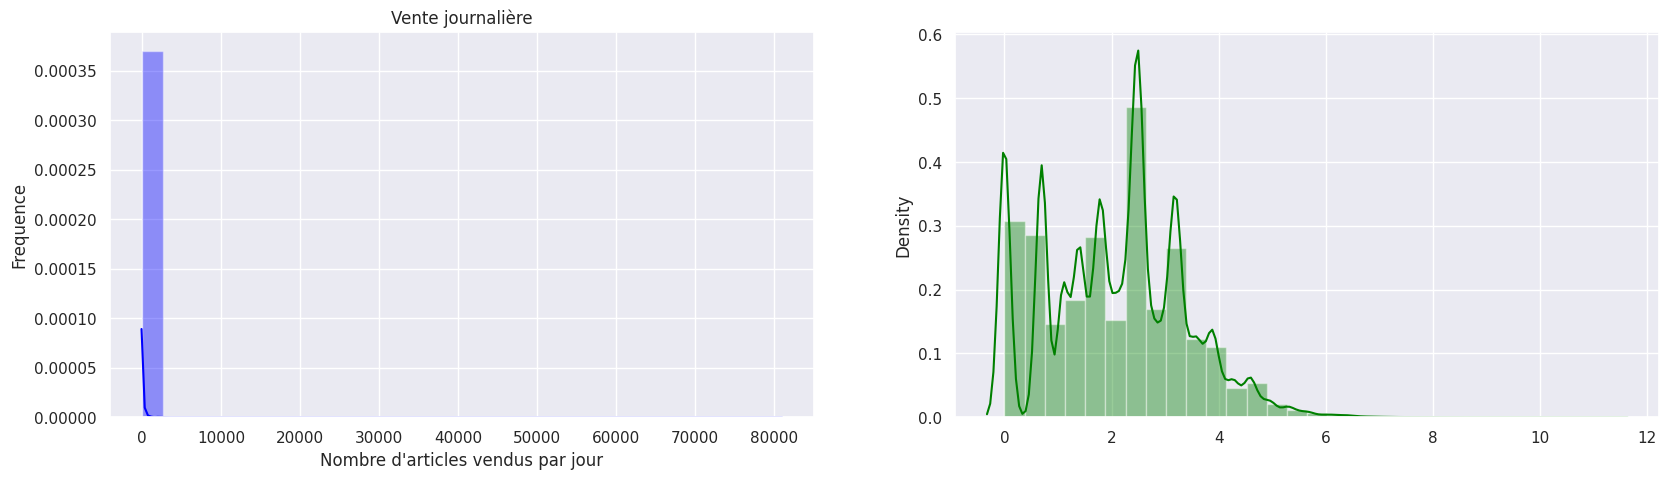

In [103]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(daily_data.Quantity.values, kde=True, ax=ax[0], color="blue", bins=30);
sns.distplot(np.log(daily_data.Quantity.values), kde=True, ax=ax[1], color="green", bins=30);
ax[0].set_xlabel("Nombre d'articles vendus par jour");
ax[0].set_ylabel("Frequence");
ax[0].set_title("Vente journalière");

Pour le graphique suivant, tilisons seulement les données des plages cibles qui sont occupées par 90 % des entrées de données.

Il s'agit d'une première stratégie facile pour exclure les valeurs aberrantes importantes, mais nous devons toujours être conscients du fait que nous avons perdu certaines informations fournies par les % restants que nous avons exclus. Il serait intéressant et utile en général de comprendre et d'analyser ce qui a causé ces valeurs aberrantes.

In [106]:

low_quantity = daily_data.Quantity.quantile(0.01)
high_quantity = daily_data.Quantity.quantile(0.99)
print((low_quantity, high_quantity))

(1.0, 192.0)


In [105]:
low_UnitPrice = daily_data.UnitPrice.quantile(0.01)
high_UnitPrice = daily_data.UnitPrice.quantile(0.99)
print((low_UnitPrice, high_UnitPrice))

(0.21, 14.95)


In [107]:
daily_data2 = daily_data.loc[
    (daily_data.Quantity >= low_quantity) & (daily_data.Quantity <= high_quantity)]
daily_data2 = daily_data2.loc[
    (daily_data2.UnitPrice >= low_UnitPrice) & (daily_data2.UnitPrice <= high_UnitPrice)]


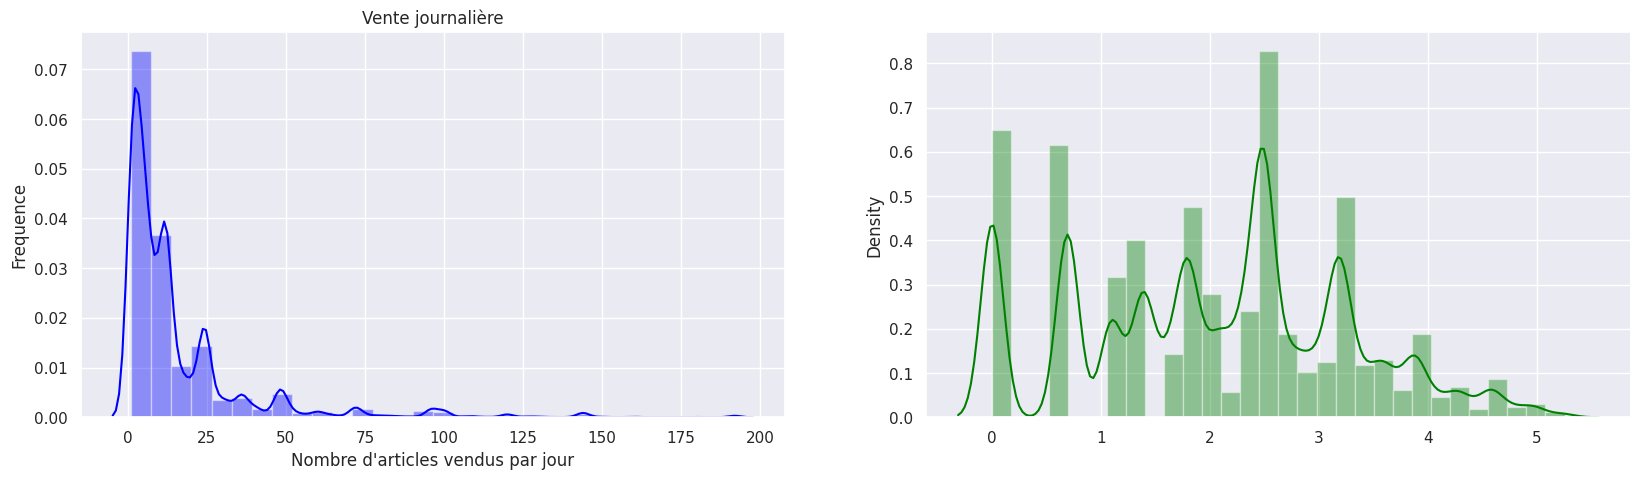

In [109]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(daily_data2.Quantity.values, kde=True, ax=ax[0], color="blue", bins=30);
sns.distplot(np.log(daily_data2.Quantity.values), kde=True, ax=ax[1], color="green", bins=30);
ax[0].set_xlabel("Nombre d'articles vendus par jour");
ax[0].set_ylabel("Frequence");
ax[0].set_title("Vente journalière");

# Des analyses plus approfondies nous permettront de valider cette stratégies.


# Analyse des produits

In [130]:
daily_data

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,UnitPrice,Country,Description,Quantity,PreChristmas
0,2010-12-01,2010,4,12,48,2,335,1,10002,0.85,France,INFLATABLE POLITICAL GLOBE,48,True
1,2010-12-01,2010,4,12,48,2,335,1,10002,0.85,United Kingdom,INFLATABLE POLITICAL GLOBE,12,True
2,2010-12-01,2010,4,12,48,2,335,1,10125,0.85,United Kingdom,MINI FUNKY DESIGN TAPES,2,True
3,2010-12-01,2010,4,12,48,2,335,1,10133,0.85,United Kingdom,COLOURING PENCILS BROWN TUBE,5,True
4,2010-12-01,2010,4,12,48,2,335,1,16014,0.42,United Kingdom,SMALL CHINESE STYLE SCISSOR,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234425,2011-12-09,2011,4,12,49,4,343,9,85038,1.85,United Kingdom,6 CHOCOLATE LOVE HEART T-LIGHTS,84,True
234426,2011-12-09,2011,4,12,49,4,343,9,85053,2.10,United Kingdom,FRENCH ENAMEL CANDLEHOLDER,2,True
234427,2011-12-09,2011,4,12,49,4,343,9,85066,12.75,United Kingdom,CREAM SWEETHEART MINI CHEST,4,True
234428,2011-12-09,2011,4,12,49,4,343,9,85152,1.85,Norway,HAND OVER THE CHOCOLATE SIGN,48,True


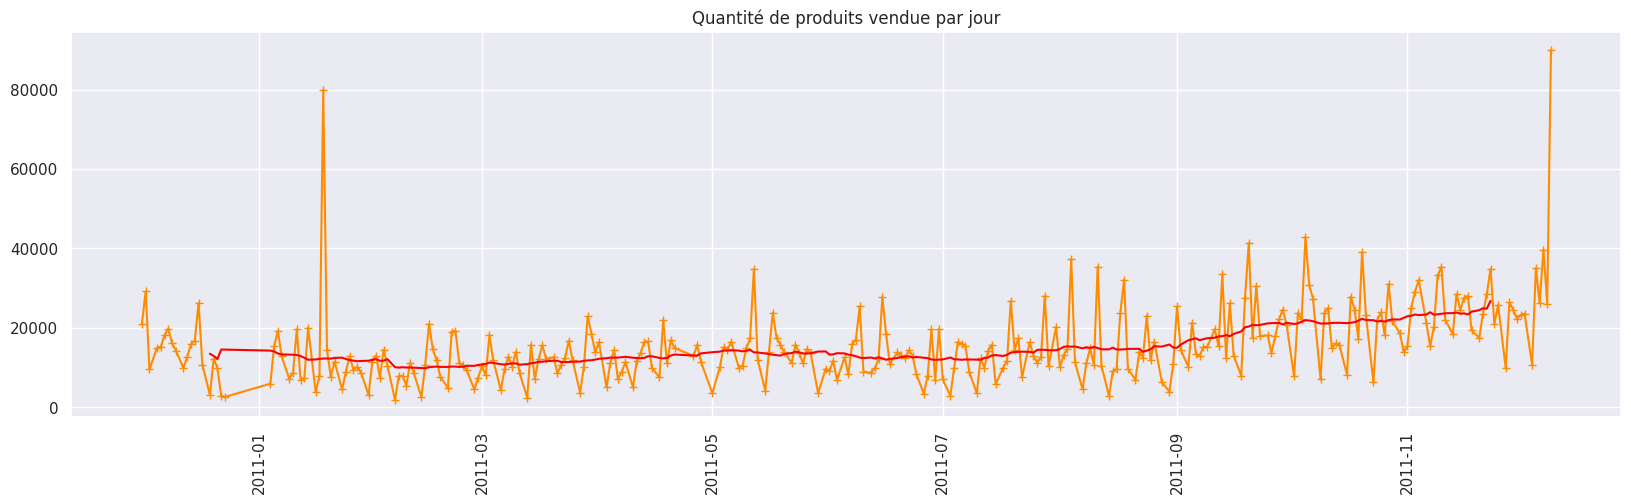

In [124]:

plt.figure(figsize=(20,5))
plt.plot(daily_data.groupby("Date").Quantity.sum(), marker='+', c="darkorange")
plt.plot(daily_data.groupby("Date").Quantity.sum().rolling(window=30, center=True).mean(),
        c="red")
plt.xticks(rotation=90);
plt.title("Quantité de produits vendue par jour");

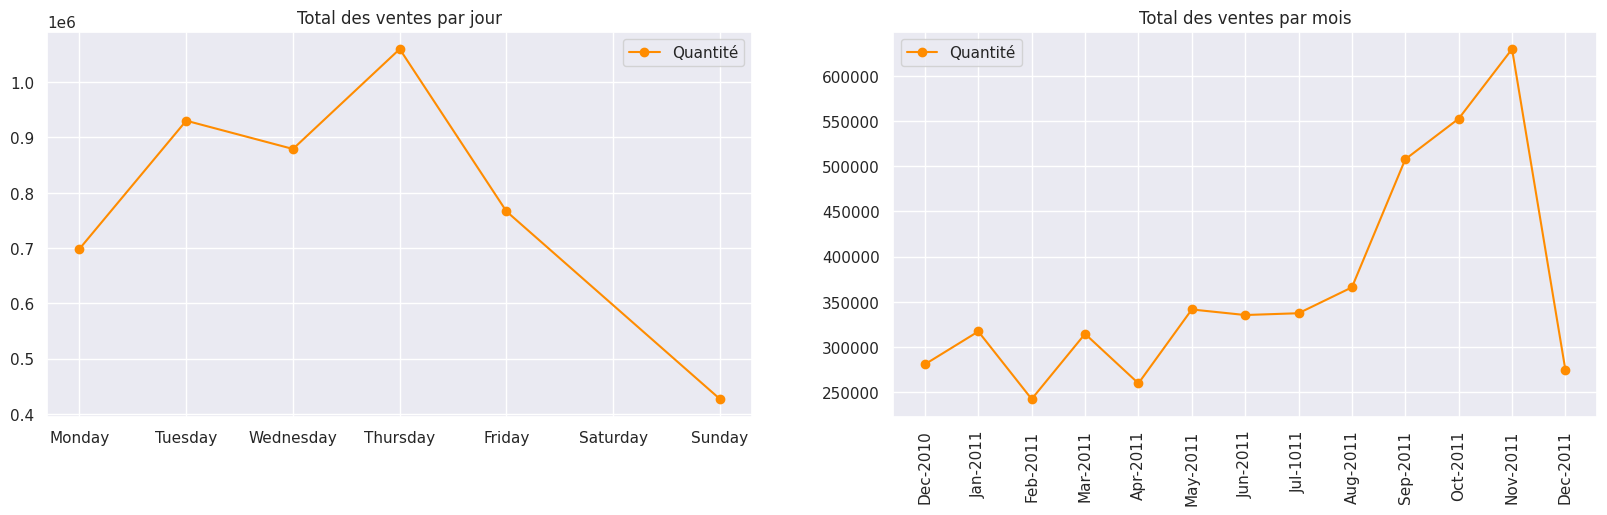

In [125]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
yearmonth = ["Dec-2010", "Jan-2011", "Feb-2011", "Mar-2011", "Apr-2011", "May-2011",
             "Jun-2011", "Jul-1011", "Aug-2011", "Sep-2011", "Oct-2011", "Nov-2011",
             "Dec-2011"]

daily_data.groupby("Weekday").Quantity.sum().plot(
    ax=ax[0], marker='o', label="Quantité", c="darkorange");
ax[0].legend();
ax[0].set_xticks(np.arange(0,7))
ax[0].set_xticklabels(weekdays);
ax[0].set_xlabel("")
ax[0].set_title("Total des ventes par jour");

ax[1].plot(daily_data.groupby(["Year", "Month"]).Quantity.sum().values,
    marker='o', label="Quantité", c="darkorange");
ax[1].set_xticklabels(yearmonth, rotation=90)
ax[1].set_xticks(np.arange(0, len(yearmonth)))
ax[1].legend();
ax[1].set_title("Total des ventes par mois");

**Les deux visualisations donnent d'autres indications intéressantes :**

* Le jeudi semble être le jour où la plupart des produits sont vendus. ( Eviter les bugs sur le site ces jours-ci)
* En revanche, le vendredi et le dimanche, les transactions sont très faibles
* Le samedi, il n'y a aucune transaction. ( planifier libre les mise à jour )
* La saison précédant Noël commence en septembre et atteint son apogée en novembre.

En effet, les mois de février et d'avril sont des mois où les ventes sont très faibles.
Créons de nouvelles fonctionnalités pour notre agrégation quotidienne qui pourraient nous aider à faire de meilleures prédictions :



In [126]:
daily_data["PreChristmas"] = (daily_data.Dayofyear <= 358) & (daily_data.Dayofyear >= 243)

In [127]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234430 entries, 0 to 234429
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          234430 non-null  datetime64[ns]
 1   Year          234430 non-null  int32         
 2   Quarter       234430 non-null  int32         
 3   Month         234430 non-null  int32         
 4   Week          234430 non-null  UInt32        
 5   Weekday       234430 non-null  int32         
 6   Dayofyear     234430 non-null  int32         
 7   Day           234430 non-null  int32         
 8   StockCode     234430 non-null  object        
 9   UnitPrice     234430 non-null  float64       
 10  Country       234430 non-null  object        
 11  Description   234430 non-null  object        
 12  Quantity      234430 non-null  int64         
 13  PreChristmas  234430 non-null  bool          
dtypes: UInt32(1), bool(1), datetime64[ns](1), float64(1), int32(6), int6

In [128]:
daily_data.shape

(234430, 14)

In [129]:
daily_data.to_csv("/content/drive/MyDrive/datasets/data_cleaned.csv",index=False)